# **Hand Written Digits Recognition**

## **Import libraries and modules**

In [2]:
# 1. Import libraries and modules
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

In [3]:
np.random.seed(123)  # for reproducibility

In [4]:
# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

In [5]:
# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Before entering the convolutional network, we have returned the image to its original form, i.e. 28x28.
Also, since the images are black and white, we have set the number of image channels to 1.

In [6]:
# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

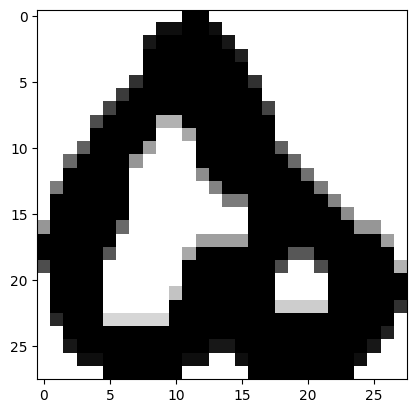

In [7]:
plt.subplot()
plt.imshow(x_train[7], cmap=plt.cm.gray_r)

In [8]:
# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [9]:
# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

## **Define model architecture**

In [10]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# 7. Fit model on training data
history = model.fit(x_train, y_train,
          epochs=58, batch_size=256, validation_data = (x_val, y_val))

Epoch 1/58
14/14 [==============================] - 10s 479ms/step - loss: 2.0196 - accuracy: 0.3349 - val_loss: 1.2833 - val_accuracy: 0.7500
Epoch 2/58
14/14 [==============================] - 6s 447ms/step - loss: 1.1544 - accuracy: 0.6097 - val_loss: 0.5585 - val_accuracy: 0.8350
Epoch 3/58
14/14 [==============================] - 3s 211ms/step - loss: 0.7651 - accuracy: 0.7371 - val_loss: 0.3600 - val_accuracy: 0.8750
Epoch 4/58
14/14 [==============================] - 3s 215ms/step - loss: 0.5968 - accuracy: 0.7957 - val_loss: 0.2834 - val_accuracy: 0.9000
Epoch 5/58
14/14 [==============================] - 4s 320ms/step - loss: 0.4921 - accuracy: 0.8349 - val_loss: 0.2250 - val_accuracy: 0.9150
Epoch 6/58
14/14 [==============================] - 3s 210ms/step - loss: 0.4140 - accuracy: 0.8671 - val_loss: 0.2295 - val_accuracy: 0.9200
Epoch 7/58
14/14 [==============================] - 3s 207ms/step - loss: 0.3527 - accuracy: 0.8891 - val_loss: 0.1538 - val_accuracy: 0.9550
Epoch

In [13]:
# Test on unseen data
results = model.evaluate(x_val, y_val)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

7/7 [==============================] - 0s 10ms/step - loss: 0.0720 - accuracy: 0.9850
Final test set loss: 0.071973
Final test set accuracy: 0.985000


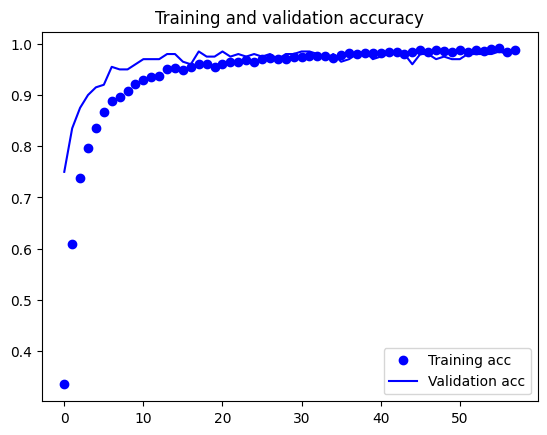

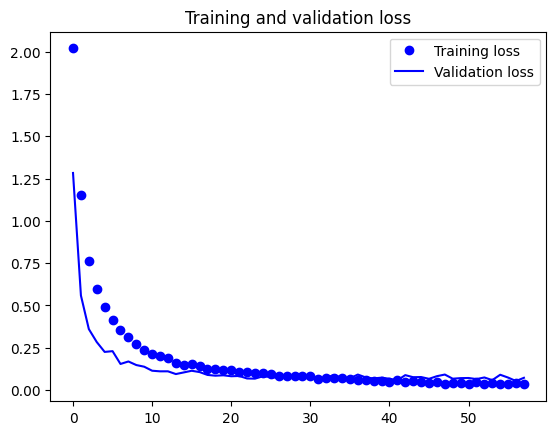

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()